# Passband comparison

## Purpose

Compare rest-frame UBV colors to observed Molino passbands for ACS or WFC3.

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from astropy.io import ascii

## Display Bessel passbands in rest frame

In [3]:
def getBessel( infile):
    data = ascii.read(infile)

    passband = dict()
    passband['wavelength'] = data['col1']
    passband['transmission'] = data['col2']
    
    return passband

In [4]:
dir = 'bessel/'
U = getBessel( dir+'bess-u.pass')
B = getBessel( dir+'bess-b.pass')
V = getBessel( dir+'bess-v.pass')
R = getBessel( dir+'bess-r.pass')
I = getBessel( dir+'bess-i.pass')

In [10]:
def plotPassbands( passbands, labels, wMin=None, wMax=None, title=None):

    plt.figure(figsize=(12,6))
    
    for p,l in zip(passbands,labels):
        w = p['wavelength']
        t = p['transmission']
        plt.plot(w,t,label=l)
    
    # apply optional axis limits...
    if wMin:
        plt.xlim(xmin=wMin) 
    if wMax:
        plt.xlim(xmax=wMax)
        
    leg=plt.legend()
        
    if title:
        plt.title( title)

    # show plot...
    plt.show()

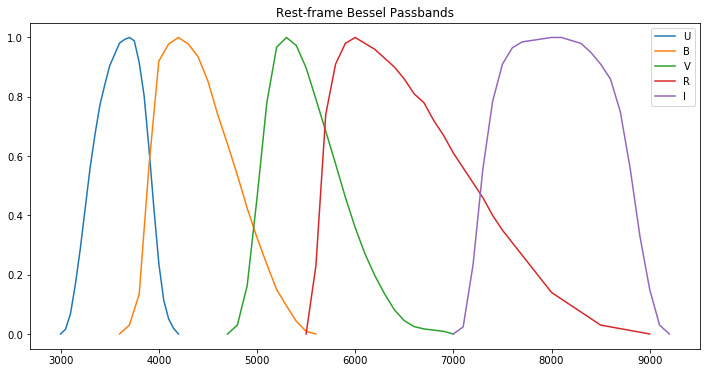

In [11]:
plotPassbands([U,B,V,R,I], labels=['U','B','V','R','I'], title='Rest-frame Bessel Passbands')

## Display WFC3 passbands

In [12]:
def getWFC3( infile):
    '''
    Returns wavelength and transmission from chip 1.
    '''
    data = ascii.read(infile, data_start=2)

    passband = dict()
    passband['wavelength'] = data['col2']
    passband['transmission'] = data['col3']
    
    return passband

In [16]:
dir = 'WFC3/UVIS/'
WFC3_F218W = getWFC3(dir+'F218W_UVIS_throughput.csv')
WFC3_F225W = getWFC3(dir+'F225W_UVIS_throughput.csv')
WFC3_F275W = getWFC3(dir+'F275W_UVIS_throughput.csv')
WFC3_F336W = getWFC3(dir+'F336W_UVIS_throughput.csv')
WFC3_F390W = getWFC3(dir+'F390W_UVIS_throughput.csv')
WFC3_F438W = getWFC3(dir+'F438W_UVIS_throughput.csv')
WFC3_F475W = getWFC3(dir+'F475W_UVIS_throughput.csv')
WFC3_F555W = getWFC3(dir+'F555W_UVIS_throughput.csv')
WFC3_F606W = getWFC3(dir+'F606W_UVIS_throughput.csv')
WFC3_F625W = getWFC3(dir+'F625W_UVIS_throughput.csv')
WFC3_F775W = getWFC3(dir+'F775W_UVIS_throughput.csv')
WFC3_F814W = getWFC3(dir+'F814W_UVIS_throughput.csv')

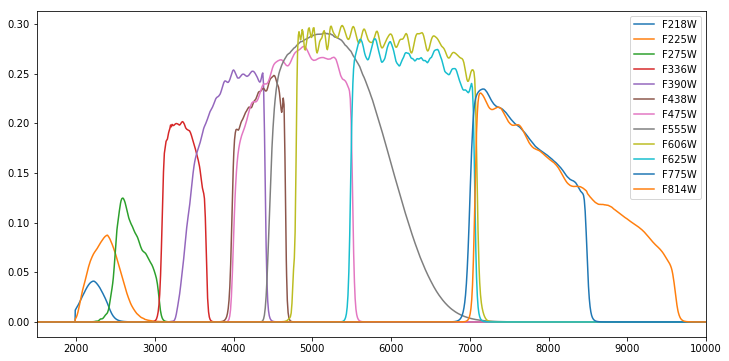

In [18]:
WFC3 = [WFC3_F218W,WFC3_F225W,WFC3_F275W,WFC3_F336W,WFC3_F390W,WFC3_F438W,WFC3_F475W,WFC3_F555W,WFC3_F606W,WFC3_F625W,WFC3_F775W,WFC3_F814W]
labels = ['F218W','F225W','F275W','F336W','F390W','F438W','F475W','F555W','F606W','F625W','F775W','F814W']
plotPassbands(WFC3, labels, wMin=1500., wMax=10000.)

## Display ACS passbands

In [19]:
def getACS( infile):
    data = ascii.read(infile)

    passband = dict()
    passband['wavelength'] = data['col1']
    passband['transmission'] = data['col2']
    
    return passband

In [22]:
dir = 'ACS/WFC/'
ACS = dict()
ACS_F435W = getACS(dir+'wfc_F435W.dat')
ACS_F475W = getACS(dir+'wfc_F475W.dat')
ACS_F502N = getACS(dir+'wfc_F502N.dat')
ACS_F550M = getACS(dir+'wfc_F550M.dat')
ACS_F555W = getACS(dir+'wfc_F555W.dat')
ACS_F606W = getACS(dir+'wfc_F606W.dat')
ACS_F625W = getACS(dir+'wfc_F625W.dat')
ACS_F658N = getACS(dir+'wfc_F658N.dat')
ACS_F660N = getACS(dir+'wfc_F660N.dat')
ACS_F775W = getACS(dir+'wfc_F775W.dat')
ACS_F814W = getACS(dir+'wfc_F814W.dat')
ACS_F850LP = getACS(dir+'wfc_F850LP.dat')
ACS_F892N = getACS(dir+'wfc_F892N.dat')

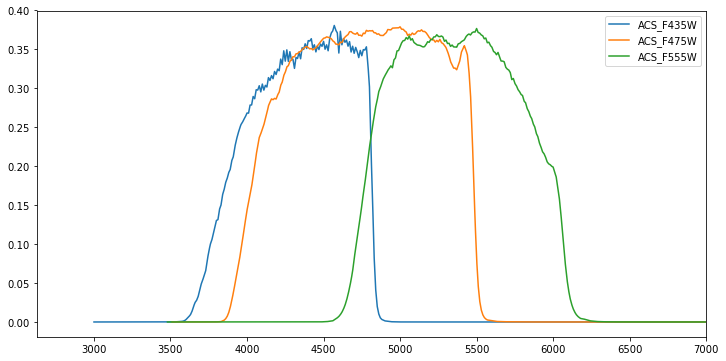

In [24]:
ACS = [ACS_F435W,ACS_F475W,ACS_F555W]
labels = ['ACS_F435W','ACS_F475W','ACS_F555W']
plotPassbands( ACS, labels, wMax=7000)

## Compare redshifted UBV to passbands in the Molino database

In [25]:
def redshiftPassband( p, z):
    p2 = dict()
    p2['wavelength'] = (1+z)*p['wavelength']
    p2['transmission'] = p['transmission']
    return p2

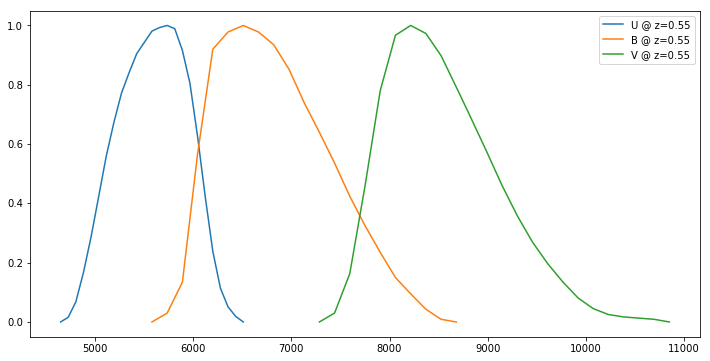

In [28]:
z = 0.55
Uz = redshiftPassband( U, z)
Bz = redshiftPassband( B, z)
Vz = redshiftPassband( V, z)
legend=['U @ z=0.55', 'B @ z=0.55', 'V @ z=0.55']
plotPassbands([Uz,Bz,Vz], legend)

In [29]:
def plotRedshiftedPassbands( passbands, shiftedPassbands, wMin=None, wMax=None, labels=None, shiftedLabels=None):

    plt.figure(figsize=(12,6))

    for p,l in zip(passbands,labels):
        w = p['wavelength']
        t = p['transmission']
        plt.plot(w,t,label=l)
        
    for p,l in zip(shiftedPassbands,shiftedLabels):
        w = p['wavelength']
        t = p['transmission']
        plt.plot(w,t,linestyle='--',label=l)
    
    # apply optional axis limits...
    if wMin:
        plt.xlim(xmin=wMin) 
    if wMax:
        plt.xlim(xmax=wMax)
        
    leg=plt.legend()

    # show plot...
    plt.show()

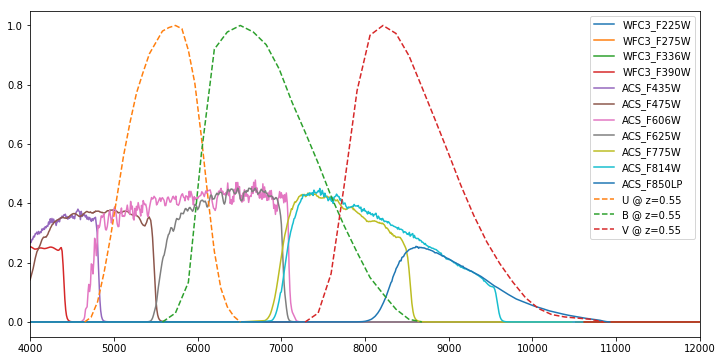

In [31]:
observed = [WFC3_F225W, WFC3_F275W, WFC3_F336W, WFC3_F390W, ACS_F435W, 
            ACS_F475W, ACS_F606W, ACS_F625W, ACS_F775W, ACS_F814W, ACS_F850LP]
labels = ['WFC3_F225W', 'WFC3_F275W', 'WFC3_F336W', 'WFC3_F390W', 'ACS_F435W', 
            'ACS_F475W', 'ACS_F606W', 'ACS_F625W', 'ACS_F775W', 'ACS_F814W', 'ACS_F850LP']
rest = [Uz,Bz,Vz]
shiftedLabels = ['U @ z=0.55','B @ z=0.55','V @ z=0.55']
plotRedshiftedPassbands( observed, rest, wMin=4000, wMax=12000, labels=labels, shiftedLabels=shiftedLabels)

## Compare U band

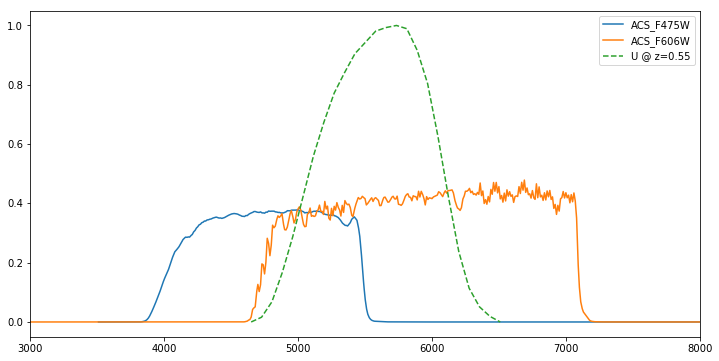

In [32]:
observed = [ACS_F475W, ACS_F606W]
labels = ['ACS_F475W', 'ACS_F606W']
rest = [Uz]
shiftedLabels = ['U @ z=0.55']
plotRedshiftedPassbands( observed, rest, wMin=3000, wMax=8000, labels=labels, shiftedLabels=shiftedLabels)

Conclusion: ACS F606W appears to be the optimal magnitude to transform.

##  Compare B band

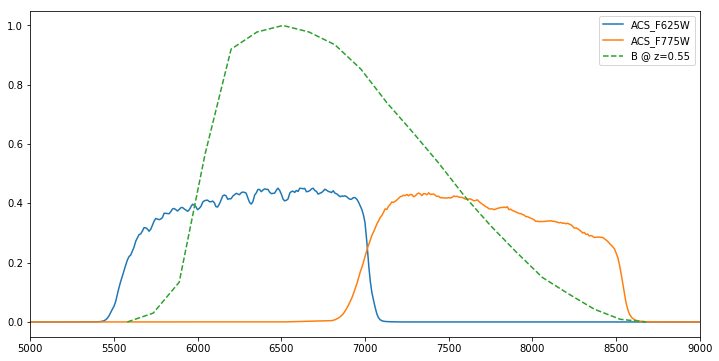

In [33]:
observed = [ ACS_F625W, ACS_F775W]
labels = ['ACS_F625W', 'ACS_F775W']
rest = [Bz]
shiftedLabels = ['B @ z=0.55']
plotRedshiftedPassbands( observed, rest, wMin=5000, wMax=9000, labels=labels, shiftedLabels=shiftedLabels)

Conclusion: ACS_F625W appears to be the optimal band to transform. 

## Compare V band

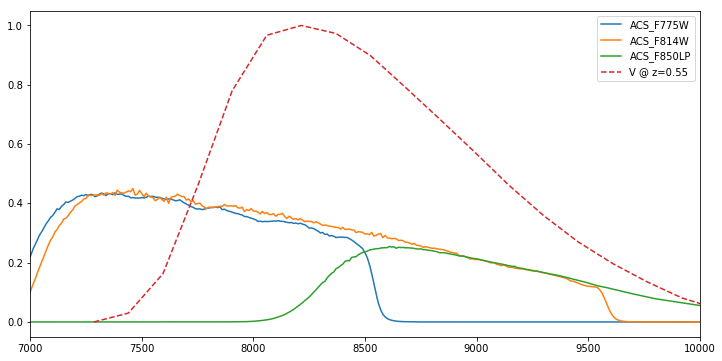

In [34]:
observed = [ ACS_F775W, ACS_F814W, ACS_F850LP]
labels = [ 'ACS_F775W', 'ACS_F814W', 'ACS_F850LP']
rest = [Vz]
shiftedLabels = ['V @ z=0.55']
plotRedshiftedPassbands( observed, rest, wMin=7000, wMax=10000, labels=labels, shiftedLabels=shiftedLabels)

Conclusion: best match is ACS_F814W